# 회귀분석(Regression Analysis)

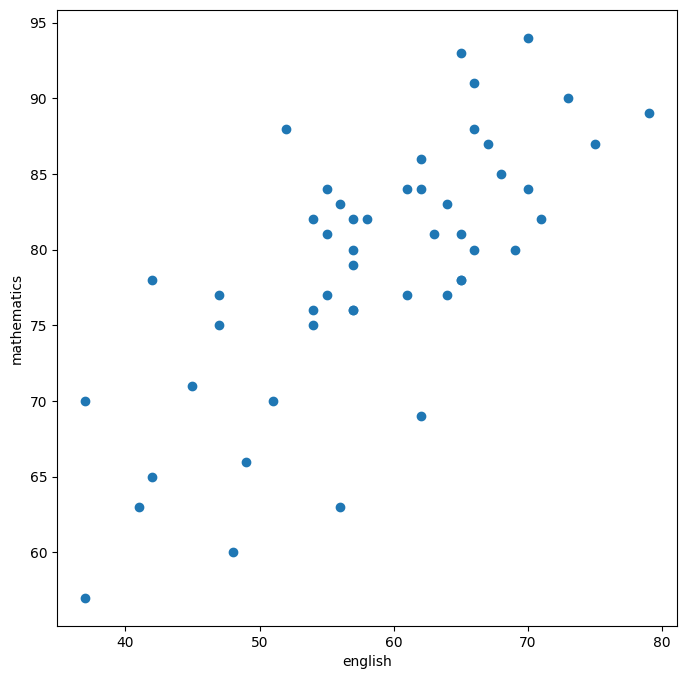

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 3)

df = pd.read_csv('datasets/student_scores.csv',
                 index_col='student number')

english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

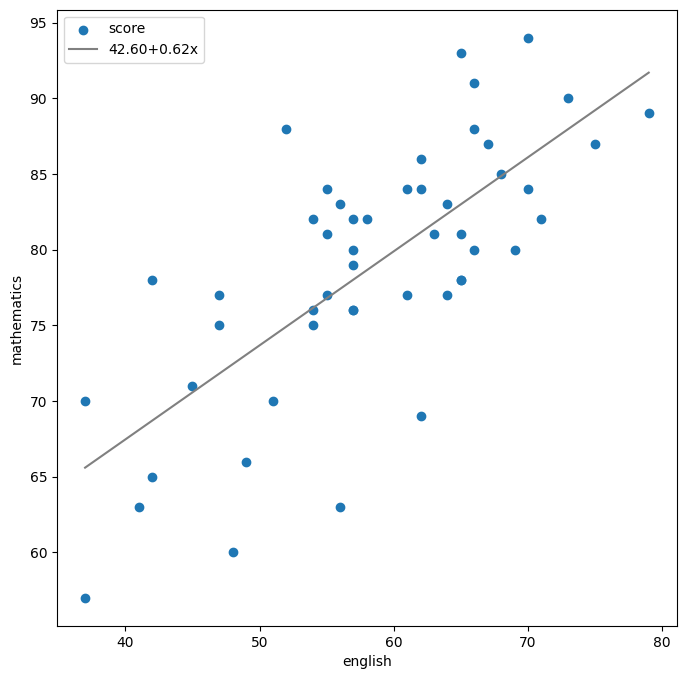

In [3]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

In [ ]:
import numpy as np

# 데이터프레임 다루기
import pandas as pd
# 기초 통계분석 패키지
from scipy import stats
# 그래프 그리기
import matplotlib.pyplot as plt
#회귀분석 가능 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 직업만족도
# survey 변수들:  name gender  income  English  jobSatisfaction  stress
df = pd.read_csv("datasets/survey.csv")

# 가상의 분석자료로 회귀분석 결과 구하기
model = smf.ols(formula = 'jobSatisfaction ~ English', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        jobSatisfaction   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.266
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.147
Time:                        14:53:31   Log-Likelihood:                -36.243
No. Observations:                  23   AIC:                             76.49
Df Residuals:                      21   BIC:                             78.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7052      1.615      3.532      0.0

In [4]:
import numpy as np

# 데이터프레임 다루기
import pandas as pd
# 기초 통계분석 패키지
from scipy import stats
# 그래프 그리기
import matplotlib.pyplot as plt
#회귀분석 가능 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 직업만족도
# survey 변수들:  name gender  income  English  jobSatisfaction  stress
df = pd.read_csv("datasets/survey.csv")

# 독립표본 t-검정
# 변수생성
male = df.income[df.gender == "m"] # 남성
female = df.income[df.gender == "f"] # 여성

#Levene의 등분산 검정
l_result = stats.levene(male, female)

# 유의 수준 표시하기
if l_result[1] > .05:
    print('P value는 %f 로 95 수준에서 유의하지 않음' % l_result[1])
else :
    print('P value는 %f 로 95 percent 수준에서 유의함' % l_result[1])

print( '남성', round(male.mean(),2), '여성',round(female.mean(),2),'\n등분산검정 결과 LeveneResult(F) : %.3f \np-value : %.3f' % (l_result))

# 가상의 분석자료로 회귀분석 결과 구하기
model = smf.ols(formula = 'jobSatisfaction ~ English + stress + income', data = df)
result = model.fit()
print(result.summary())

P value는 0.258716 로 95 수준에서 유의하지 않음
남성 4285.64 여성 4333.11 
등분산검정 결과 LeveneResult(F) : 1.348 
p-value : 0.259
                            OLS Regression Results                            
Dep. Variable:        jobSatisfaction   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.458
Date:                Sun, 31 Aug 2025   Prob (F-statistic):              0.258
Time:                        00:52:47   Log-Likelihood:                -35.038
No. Observations:                  23   AIC:                             78.08
Df Residuals:                      19   BIC:                             82.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

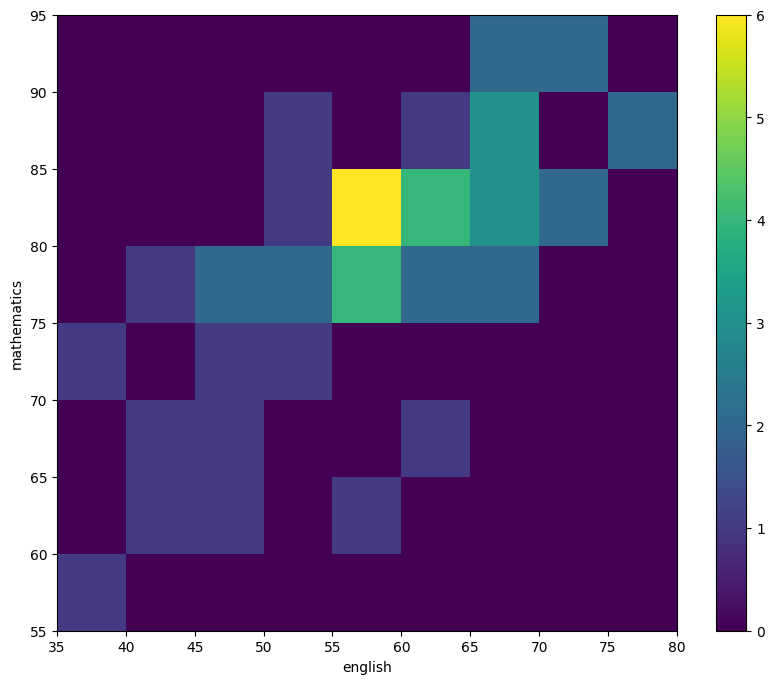

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

df = pd.read_csv('datasets/scores_reg.csv')
n = len(df)
print(n)
df.head()


20


,quiz,...,school_method
0,4.2,...,bus
1,7.2,...,bicycle
2,0.0,...,bus
3,3.0,...,walk
4,1.5,...,walk


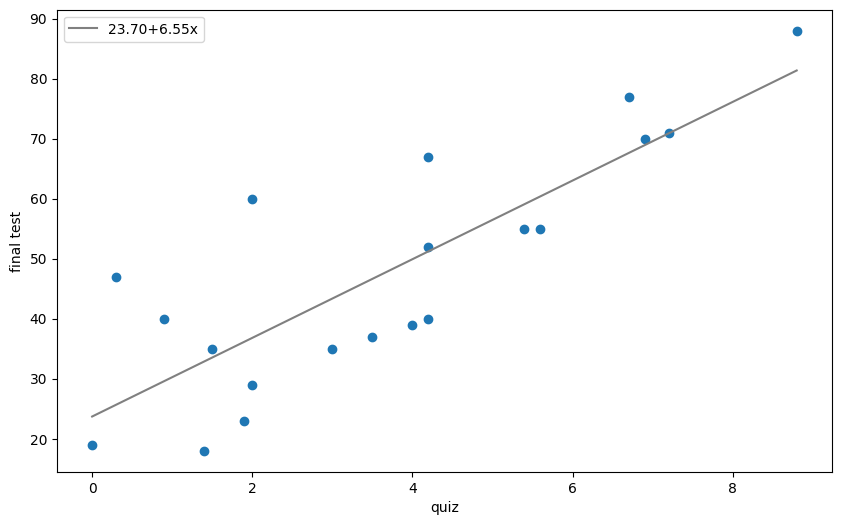

In [8]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [9]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           8.59e-06
Time:                        00:53:18   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [11]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat)

y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

s_var = np.var(eps_hat, ddof=p+1)
print(s_var)


23.699495346731215 6.553732606043083
134.29043473495898


In [12]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(np.float64(4.713837012645704), np.float64(1.0685841387335373))

In [13]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
print(lcl, hcl)

rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
print(lcl, hcl)

13.79609127276025 33.60289942070218
4.308720637125891 8.798744574960276


In [14]:
t = beta1_hat / np.sqrt(s_var * C1)
print(t)

print((1 - rv.cdf(t)) * 2)

6.1330992745320225
8.590875866687497e-06


In [15]:
t = beta0_hat / np.sqrt(s_var * C0)
print(t)


print((1 - rv.cdf(t)) * 2)


5.0276442064401285
8.745298393209033e-05


In [16]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           6.19e-06
Time:                        00:53:33   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat, beta2_hat)

y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
print(lcl, hcl)


-1.8709143470995777 6.428878343002363 4.1917065463986845
0.4402533325435849 7.943159760253783


In [18]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           7.47e-05
Time:                        00:53:38   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           8.59e-06
Time:                        00:53:40   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
y_hat = np.array(result.fittedvalues)
print(y_hat)

eps_hat = np.array(result.resid)
print(eps_hat)

print(np.sum(eps_hat ** 2))


[51.225 70.886 23.699 43.361 33.53  29.598 36.152 46.638 49.914 59.09
 51.225 68.92  36.807 81.372 25.666 67.61  51.225 60.4   32.875 36.807]
[ 15.775   0.114  -4.699  -8.361   1.47   10.402 -13.152  -9.638 -10.914
  -4.09  -11.225   1.08   -7.807   6.628  21.334   9.39    0.775  -5.4
 -14.875  23.193]
2417.2278252292617


In [21]:

total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

print(total_var, exp_var + unexp_var)

print(exp_var / total_var)

print(np.corrcoef(x, y)[0, 1] ** 2)


7468.55 7468.549999999996
0.6763457665504996
0.6763457665504998


In [22]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))


np.float64(0.6583649758033058)

In [23]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
print(f)

rv = stats.f(p, n-p-1)
print(1 - rv.cdf(f))


37.61490671126523
8.590875866687497e-06


0.030870000000000022


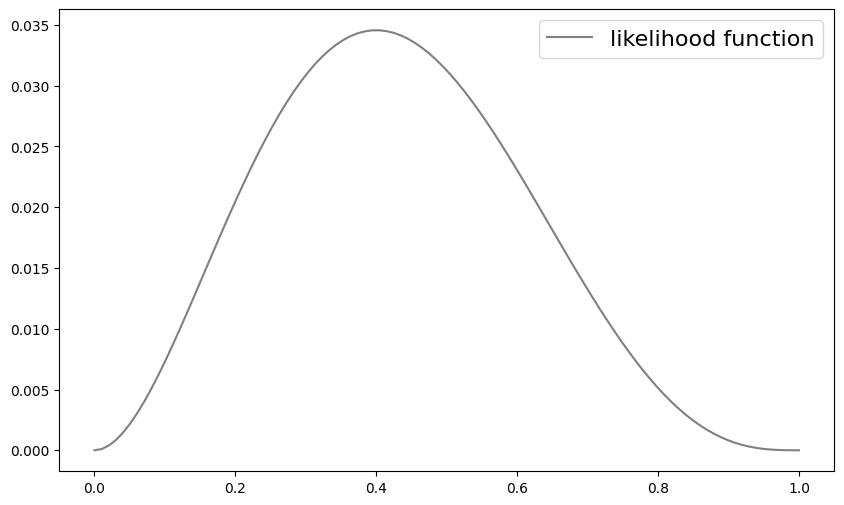

In [24]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
print(L)

ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()


In [25]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
print(mll )

rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
print(mll)

aic = -2 * mll + 2 * (p+1)
print(aic)

bic = -2 * mll + np.log(n) * (p+1)
print(bic)


-3.365058335046282
-76.32521428624038
156.65042857248076
158.64189311958876


In [26]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
print(result.summary())

eps_hat = np.array(result.resid)
print(eps_hat)

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           6.19e-06
Time:                        00:54:19   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.8

In [27]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

np.float64(1.508218526442302)

In [28]:
df['mid_test'] = df['quiz'] * 2
print(df.head())

formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
print(result.summary())


   quiz  ...  mid_test
0   4.2  ...       8.4
1   7.2  ...      14.4
2   0.0  ...       0.0
3   3.0  ...       6.0
4   1.5  ...       3.0

[5 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           8.59e-06
Time:                        00:54:24   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

In [29]:
print(stats.skew(eps_hat))

print(stats.kurtosis(eps_hat, fisher=False))


0.6599489486177468
2.4365833256763016
